# US


data from https://github.com/CSSEGISandData/COVID-19

or

https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
import datetime

In [3]:
now  = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

In [4]:
print(datetime.datetime.now())
print(now)

2020-06-01 08:20:04.713182
20200601_082004


In [5]:
xl_writer = pd.ExcelWriter(f"covid19_USA_data_{now}.xlsx")

In [6]:
url_cases = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv?_sm_au_=iVVZQ0fSPs48H6VNRMpVsKQtC6Vvq"

In [7]:
url_deaths = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"

In [8]:
def crt_data(url, xl_writer, name):
    df = pd.read_csv(url)
    df.to_excel(xl_writer, name)
    if "Population" in df.columns:
        columns_to_del = ["UID", "iso2", "code3", "iso3", "FIPS", "Admin2", "Country_Region", "Lat", "Long_", "Combined_Key", "Population"]
    else:
        columns_to_del = ["UID", "iso2", "code3", "iso3", "FIPS", "Admin2", "Country_Region", "Lat", "Long_", "Combined_Key"]
    df2 = df[(df["iso2"] == "US") & (~df["Admin2"].isna())].drop(columns=columns_to_del)
    df4 = pd.DataFrame(df2.groupby(by=["Province_State",]).sum().T.to_records()).rename(columns={'index': 'date'})
    df4["date"] = pd.to_datetime(df4["date"])
    df4["day_of_year"] = df4["date"].dt.dayofyear
    return df4.set_index(['date', 'day_of_year'])

In [9]:
cases = crt_data(url_cases, xl_writer, "Cases Raw")

In [10]:
cases.to_excel(xl_writer, "Cases")

In [11]:
cases_summary = cases.max()

In [12]:
cases_summary.sort_values(ascending=False, inplace=True)

In [13]:
cases_summary.to_excel(xl_writer, "Cases Summary")

In [14]:
deaths = crt_data(url_deaths, xl_writer, "Deaths Raw")

In [15]:
deaths.to_excel(xl_writer, "Deaths")

In [16]:
deaths_summary = deaths.max()

In [17]:
xl_writer.close()

In [18]:
def plot_data(dataframe, logx=False, logy=False, **kwargs):
    if logx:
        df = dataframe.reset_index(level=0, drop=True)
        return df.plot(logx=logx, logy=logy, **kwargs)
    else:
        df = dataframe.reset_index(level=1, drop=True)
        return df.plot(logy=logy, **kwargs) 

In [19]:
def plot_state(cases, deaths, state="California", exp=False):
    fig, ((ax11, ax12), (ax21, ax22)) = plt.subplots(2, 2, figsize=(16, 13))
    if isinstance(state, (list, tuple)):
        pass
    else:
        fig.suptitle(state)
    #
    plot11 = plot_data(cases[state], ax=ax11)
    plot21 = plot_data(deaths[state], ax=ax21)
    if exp:
        plot12 = plot_data(cases[state], logy=True, logx=False, ax=ax12)
        plot22 = plot_data(deaths[state], logy=True, logx=False, ax=ax22)
    else:
        plot22 = plot_data(cases[state], logy=True, logx=False, ax=ax12)
        plot22 = plot_data(deaths[state], logy=True, logx=False, ax=ax22)
    

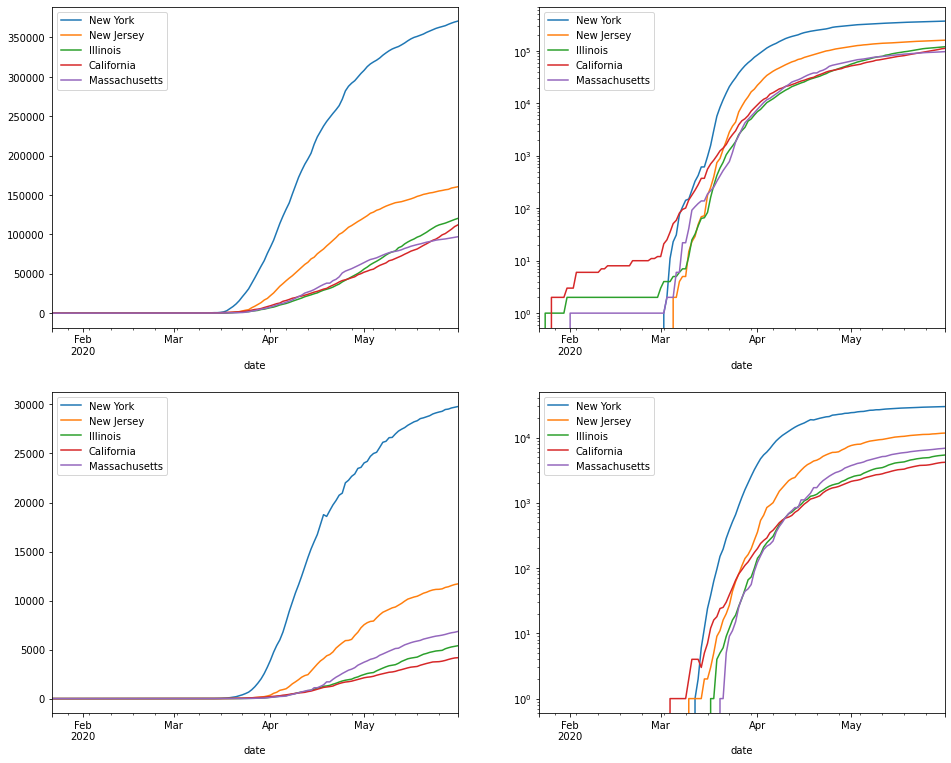

In [20]:
plot_state(cases, deaths, state=list(cases_summary.index[:5]))

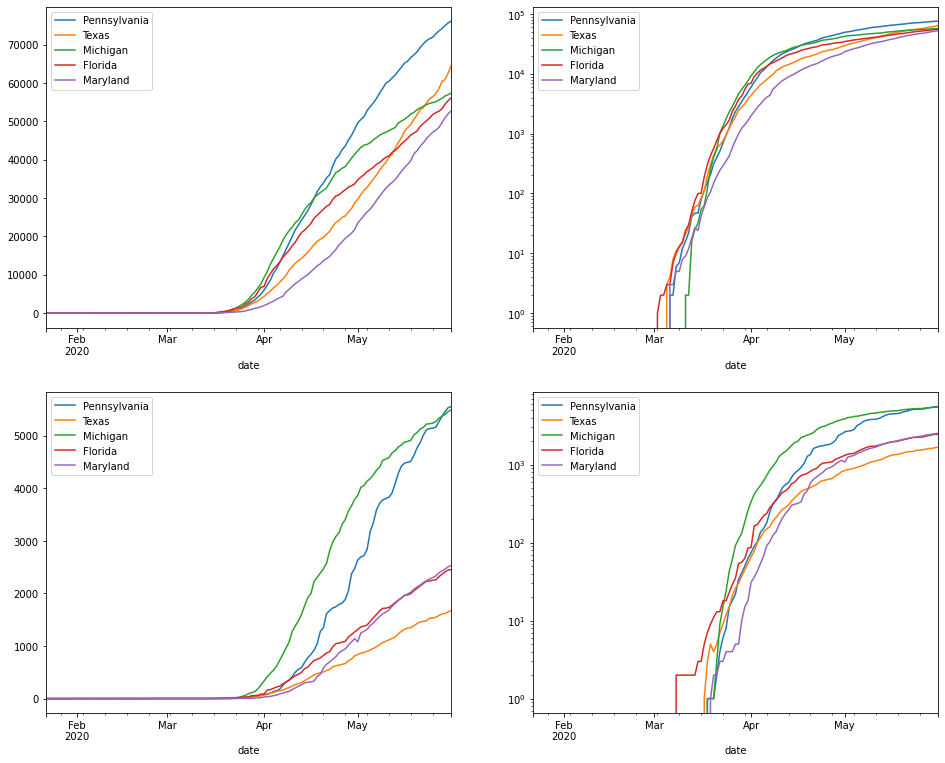

In [21]:
plot_state(cases, deaths, state=list(cases_summary.index[5:10]))

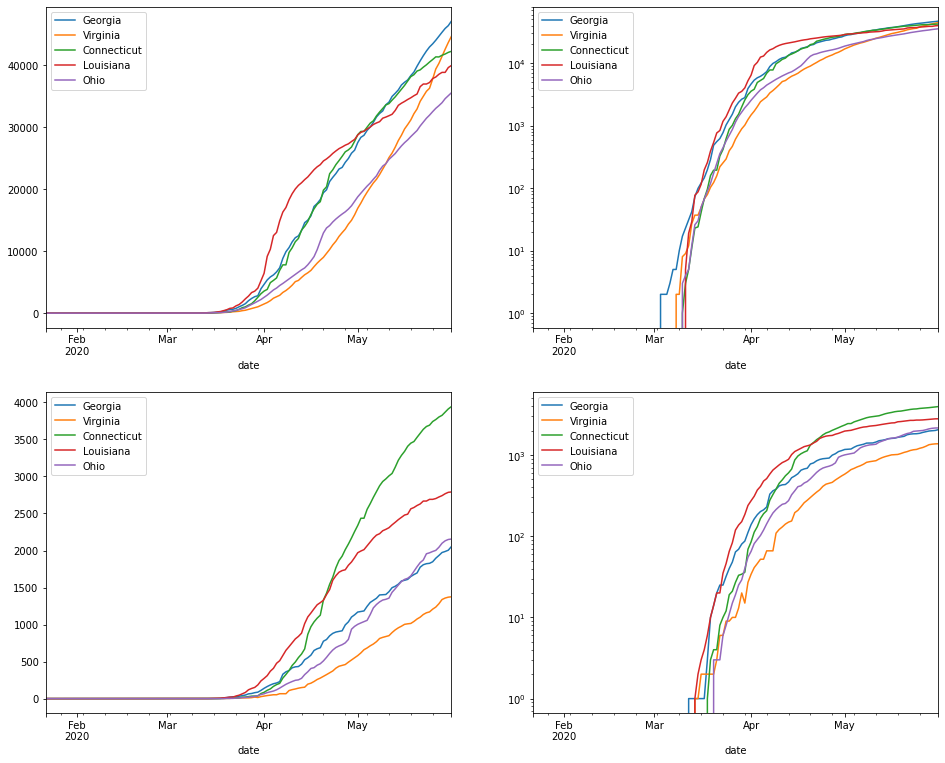

In [22]:
plot_state(cases, deaths, state=list(cases_summary.index[10:15]))

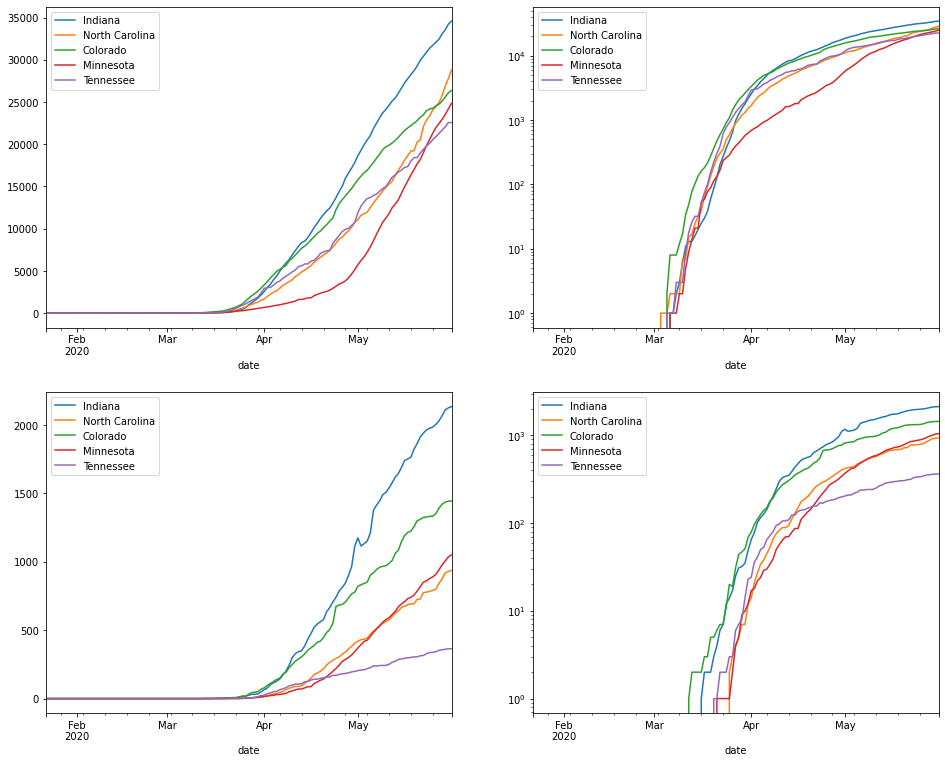

In [23]:
plot_state(cases, deaths,  state=list(cases_summary.index[15:20]))

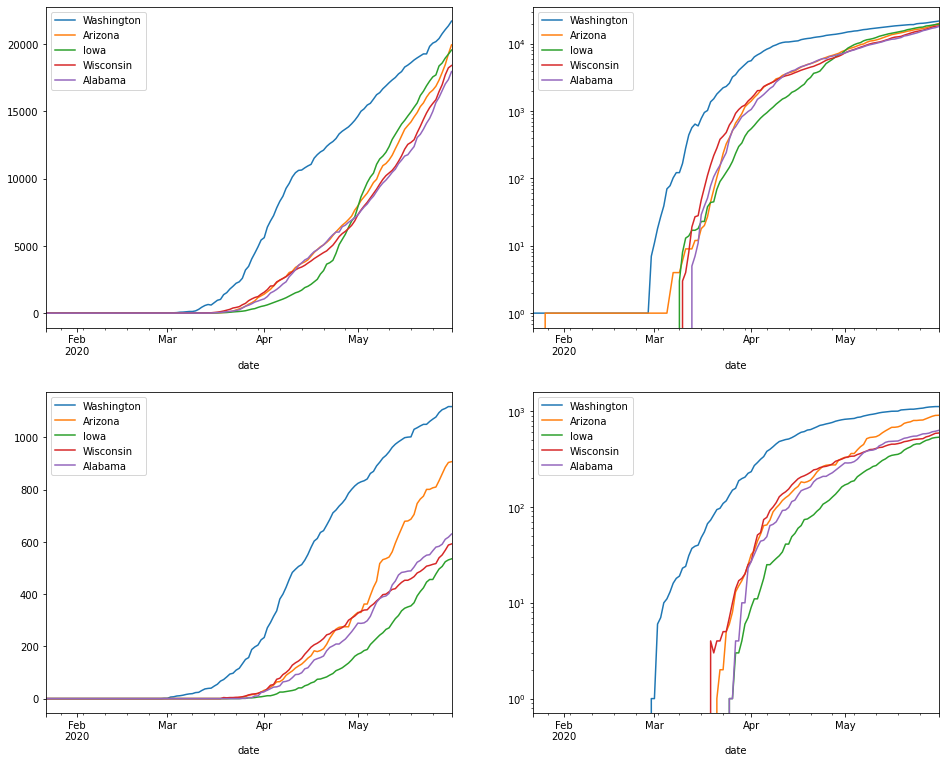

In [24]:
plot_state(cases, deaths, state=list(cases_summary.index[20:25]))

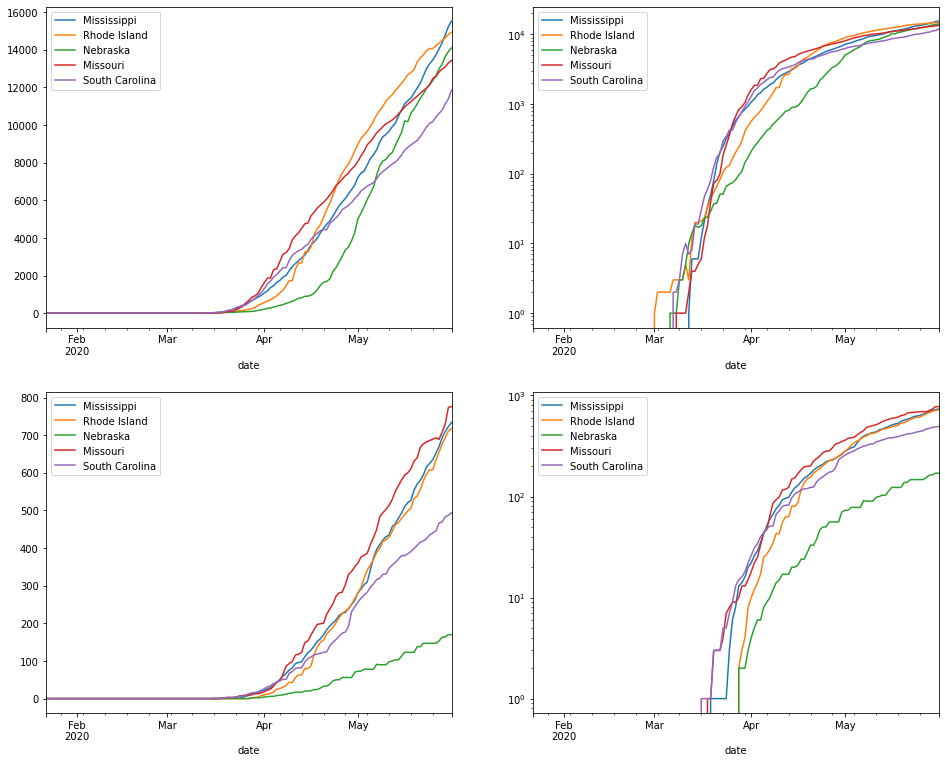

In [25]:
plot_state(cases, deaths, state=list(cases_summary.index[25:30]))

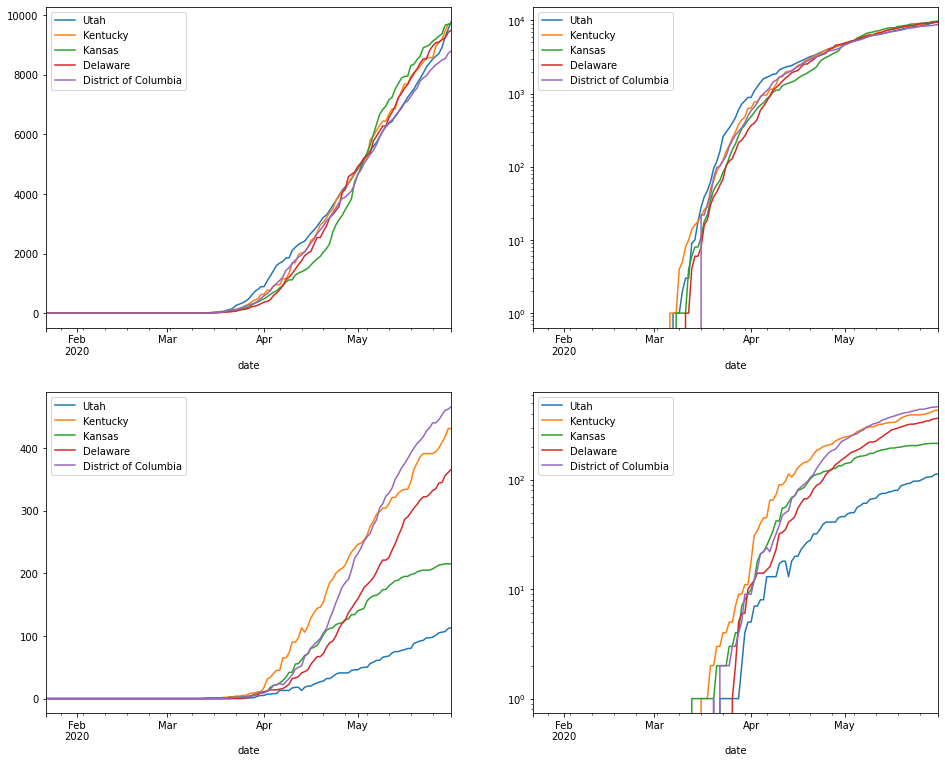

In [26]:
plot_state(cases, deaths, state=list(cases_summary.index[30:35]))

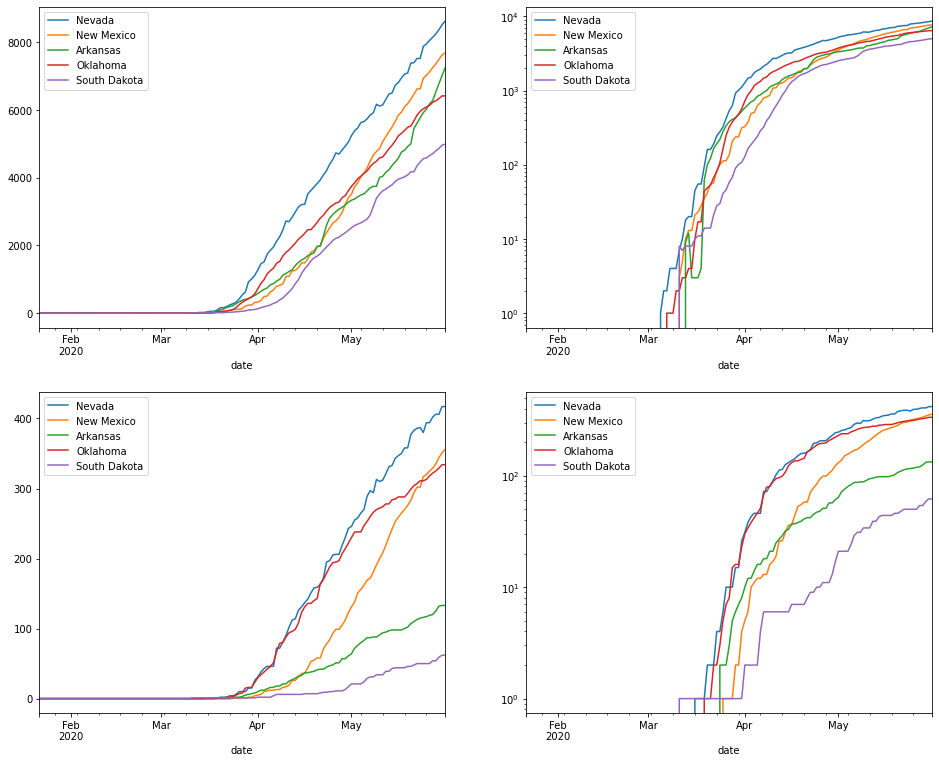

In [27]:
plot_state(cases, deaths, state=list(cases_summary.index[35:40]))

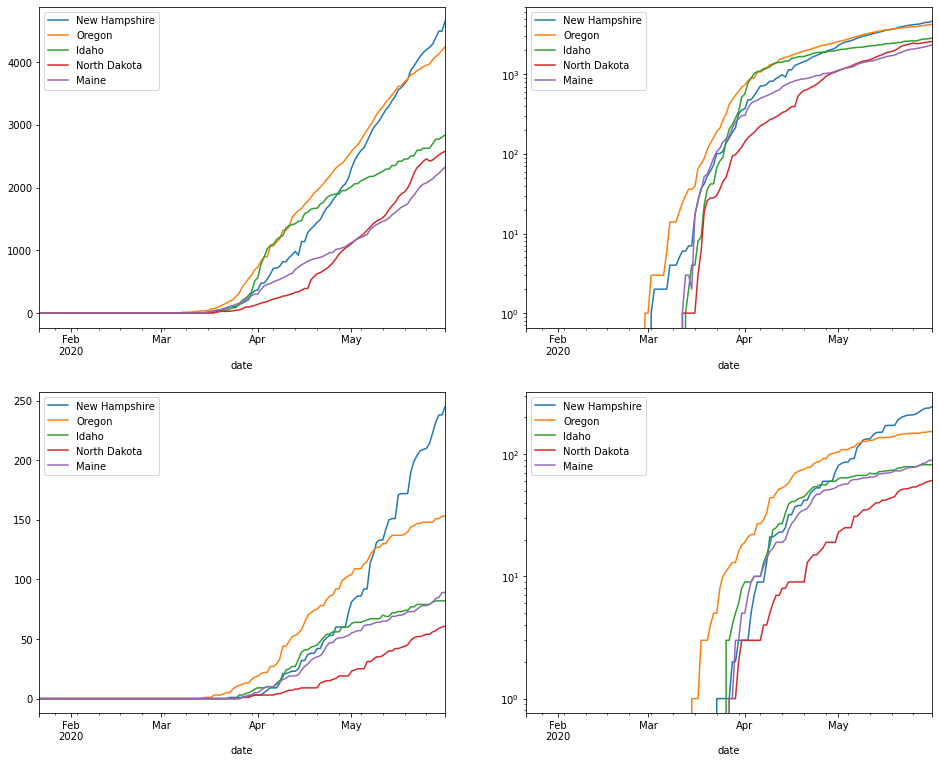

In [28]:
plot_state(cases, deaths, state=list(cases_summary.index[40:45]))

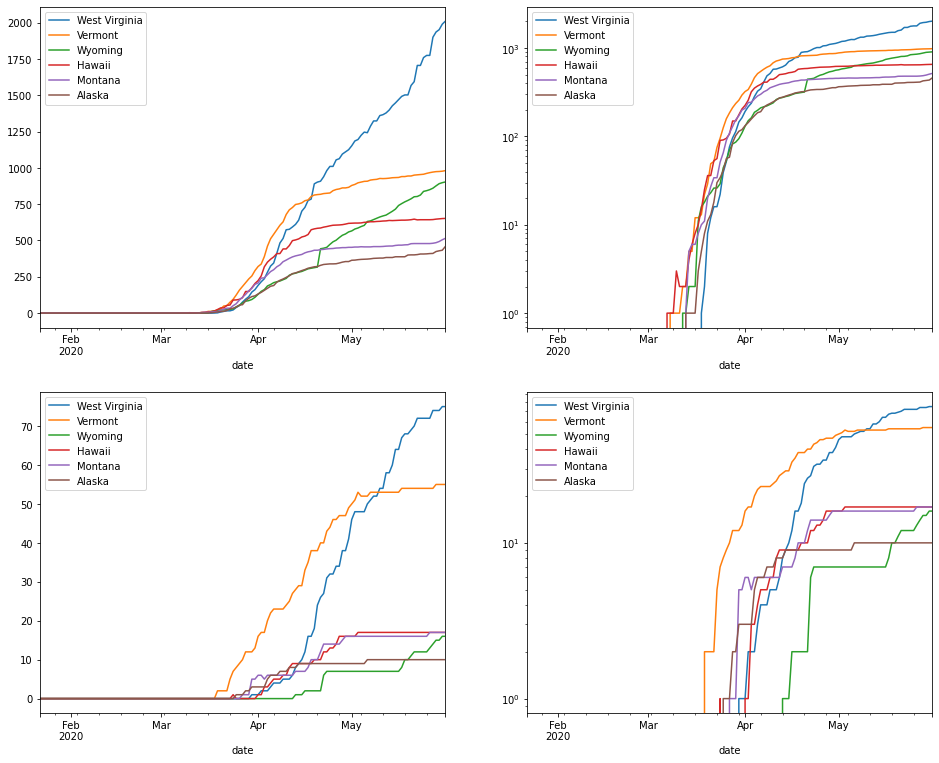

In [29]:
plot_state(cases, deaths, state=list(cases_summary.index[45:]))

In [30]:
def plot_daily(cases, deaths, state):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
    # Cases
    # df1 = cases.loc[cases[state] >0, state].to_frame()
    df1 = cases[state].to_frame()
    df1.columns = ["cases"]
    df1["daily cases"] = df1["cases"].diff()
    df1.loc[df1["daily cases"].isna(), "daily cases"] = 0
    # data["daily_smooth"] = signal.savgol_filter(data["daily cases"], 11, 3)
    df1["daily_smooth_2"] = signal.savgol_filter(df1["cases"], 11, 3, deriv=1)
    # data.reset_index("day", drop=True, inplace=True)
    df1.reset_index("day_of_year", drop=True, inplace=True)
    df1["cases"].plot(ax=ax1, color="r", title=f"Cases in {state}", legend=True, label="Cumulative")
    df1["daily cases"].plot(ax=ax1, secondary_y=True, style="co--", legend=True, label="Daily")  
    # data["daily_smooth"].plot(secondary_y=True, color="b", rot=0, legend=True, label="Daily 2")  
    df1["daily_smooth_2"].plot(ax=ax1, secondary_y=True, color="b", legend=True, label="Daily 2")
    # Deaths
    # df2 = deaths.loc[deaths[state] >0, state].to_frame()
    df2 = deaths[state].to_frame()
    df2.columns = ["deaths"]
    df2["daily deaths"] = df2["deaths"].diff()
    df2.loc[df2["daily deaths"].isna(), "daily deaths"] = 0
    # data["daily_smooth"] = signal.savgol_filter(data["daily cases"], 11, 3)
    df2["daily_smooth_2"] = signal.savgol_filter(df2["deaths"], 11, 3, deriv=1)
    # data.reset_index("day", drop=True, inplace=True)
    df2.reset_index("day_of_year", drop=True, inplace=True)
    df2["deaths"].plot(ax=ax2, color="r", title=f"Deaths in {state}", legend=True, label="Cumulative")
    df2["daily deaths"].plot(ax=ax2, secondary_y=True, style="co--", legend=True, label="Daily")  
    # data["daily_smooth"].plot(secondary_y=True, color="b", rot=0, legend=True, label="Daily 2")  
    df2["daily_smooth_2"].plot(ax=ax2, secondary_y=True, color="b", legend=True, label="Daily 2")  

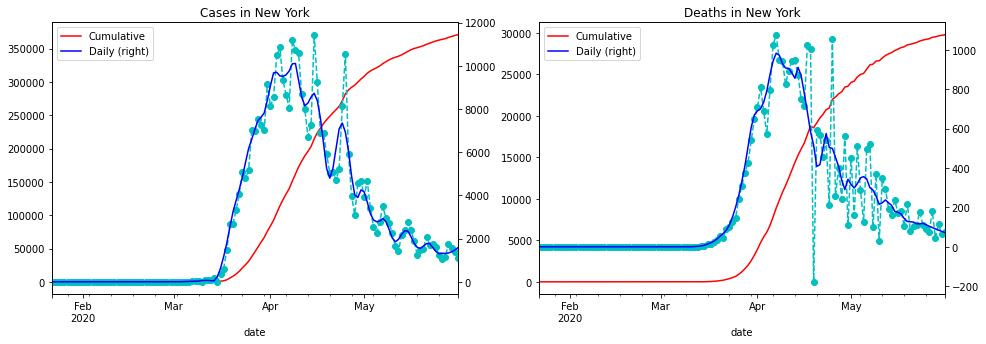

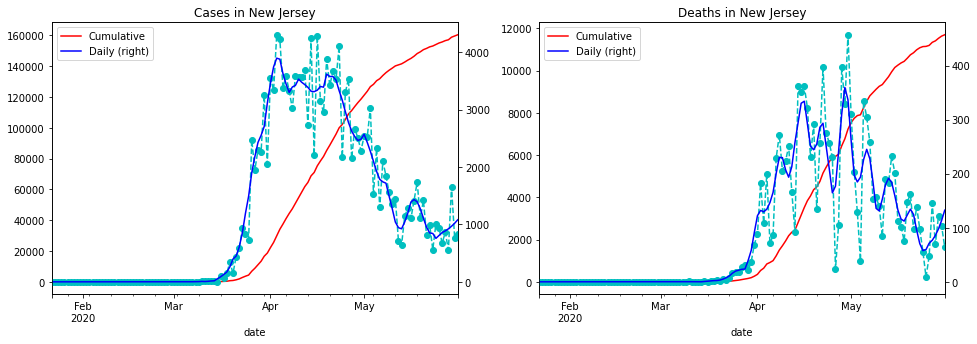

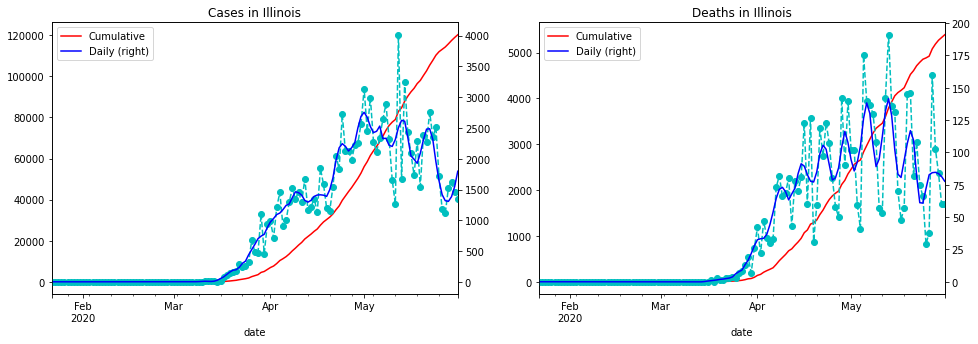

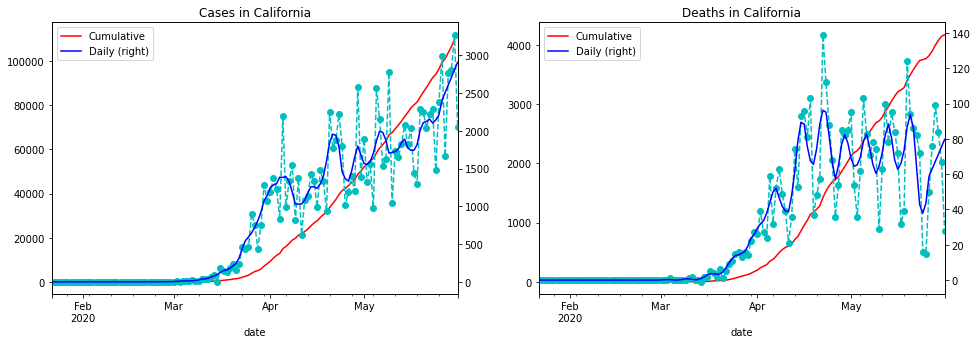

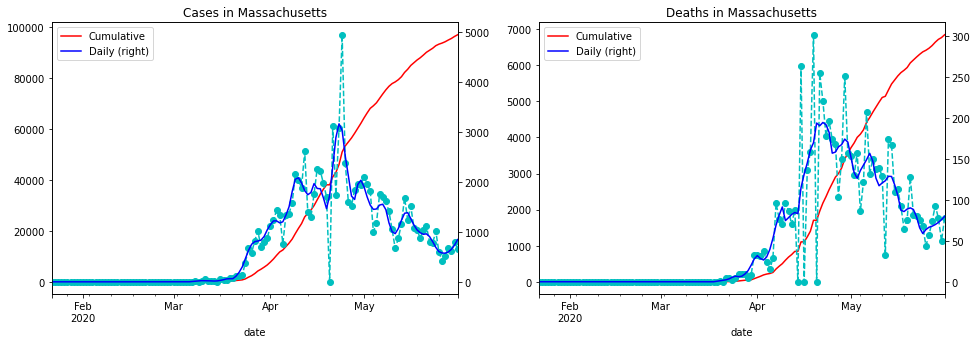

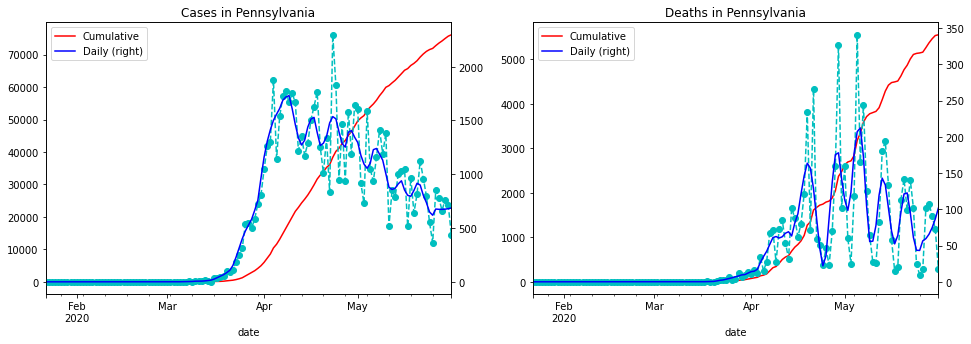

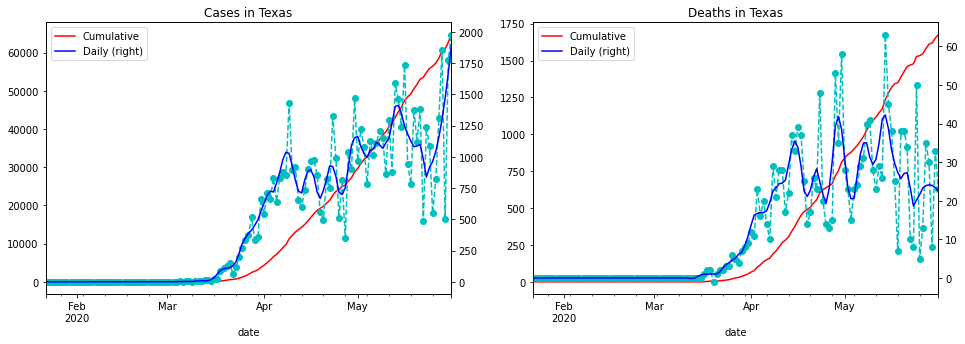

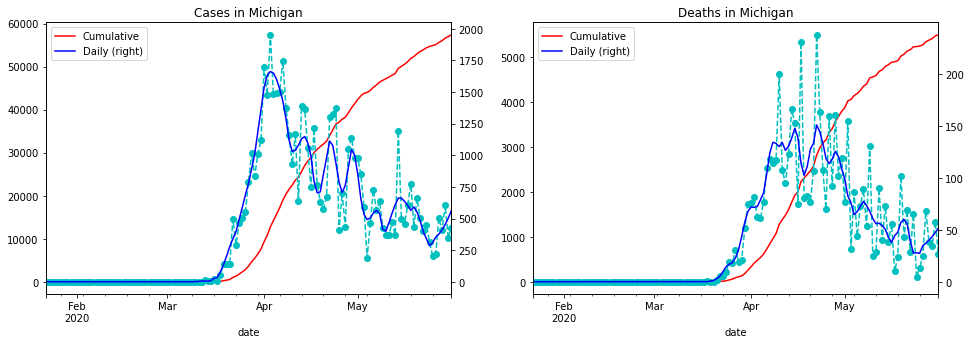

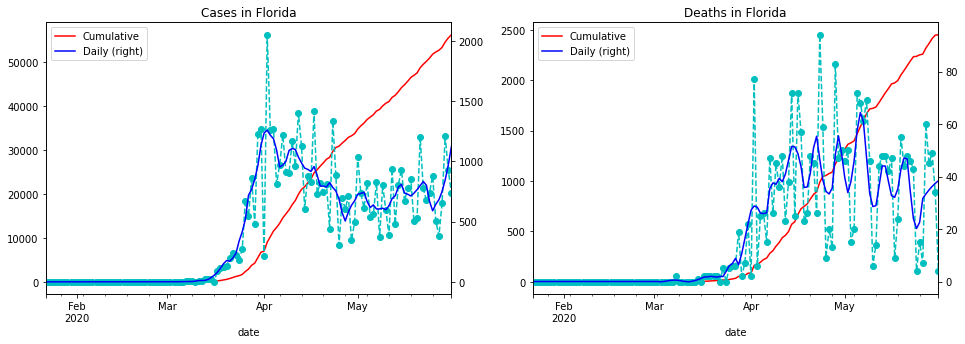

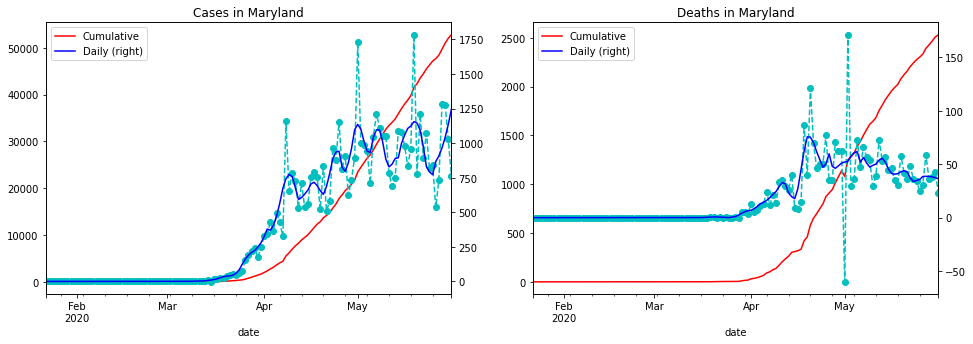

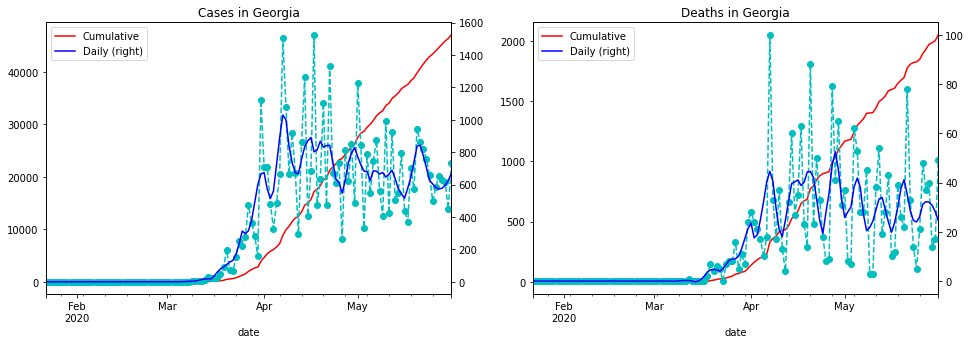

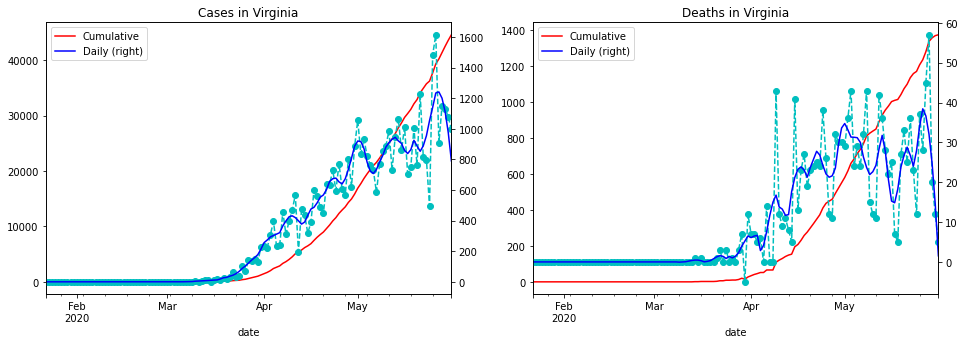

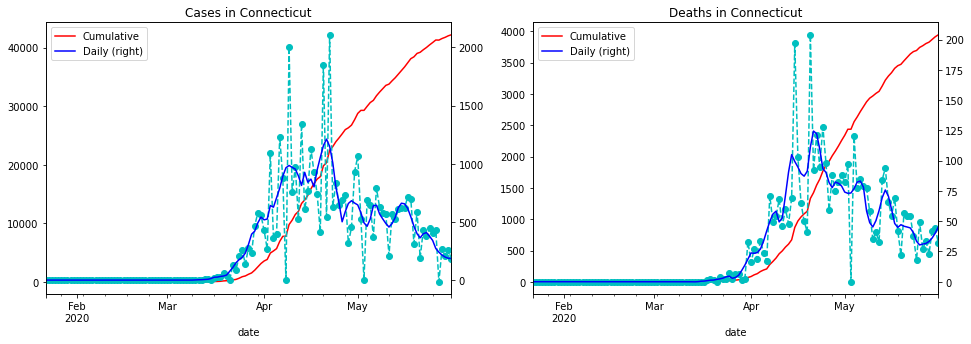

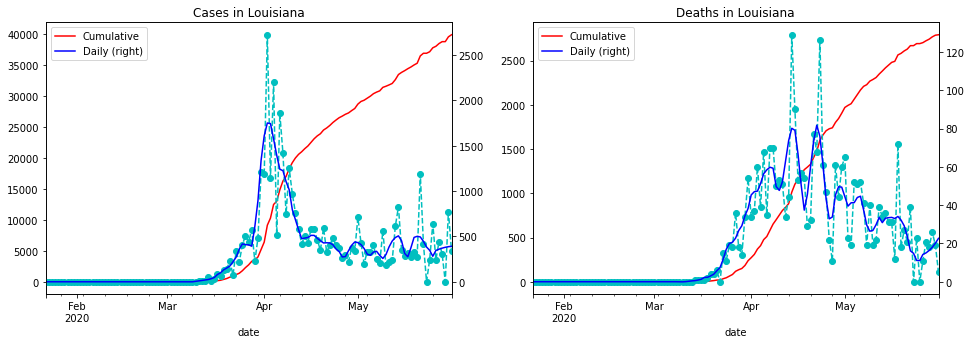

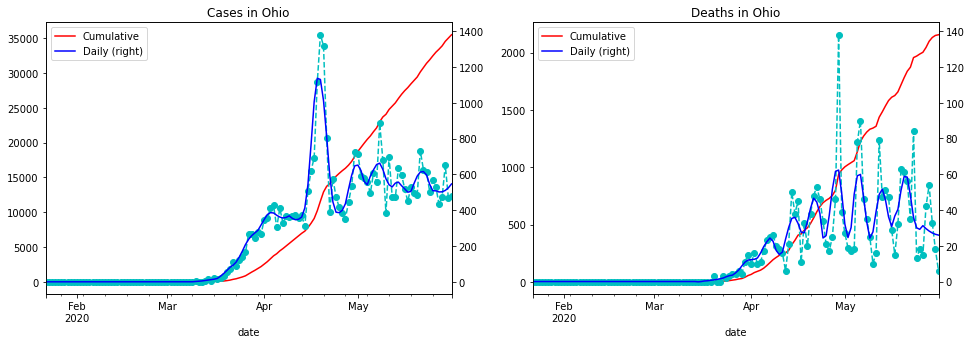

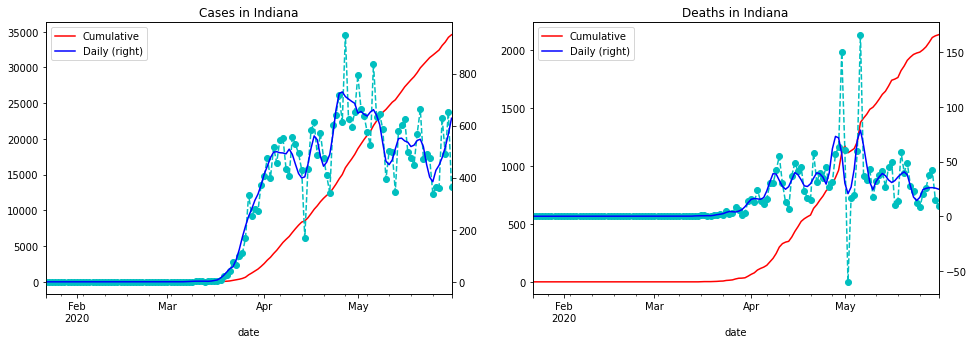

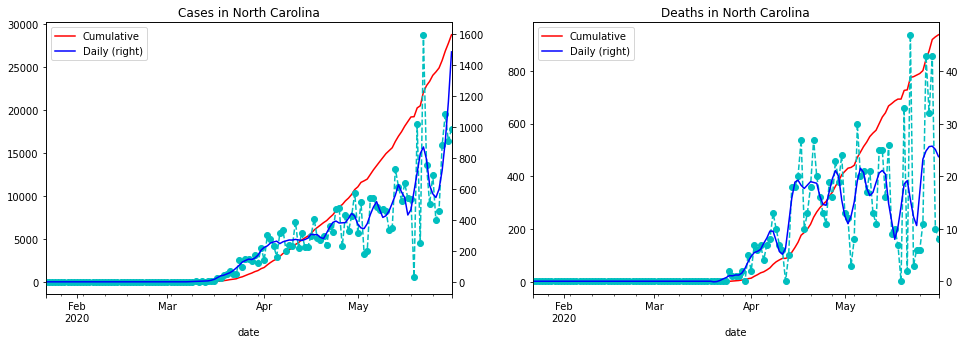

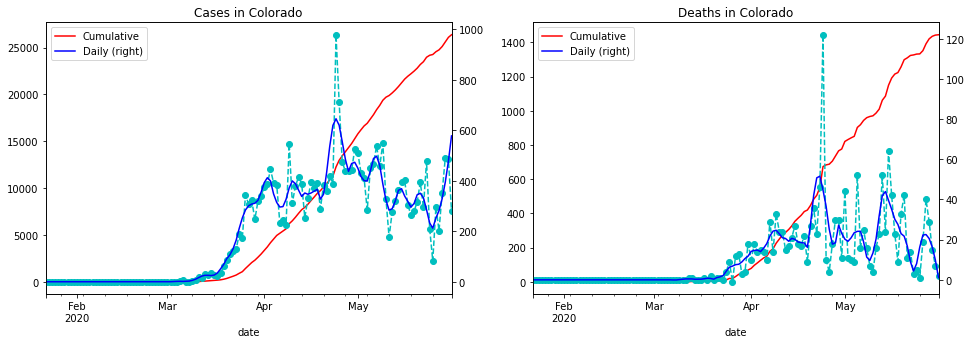

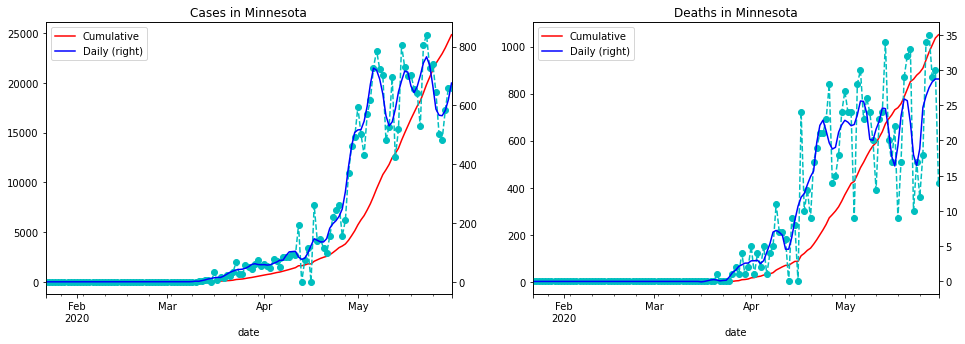

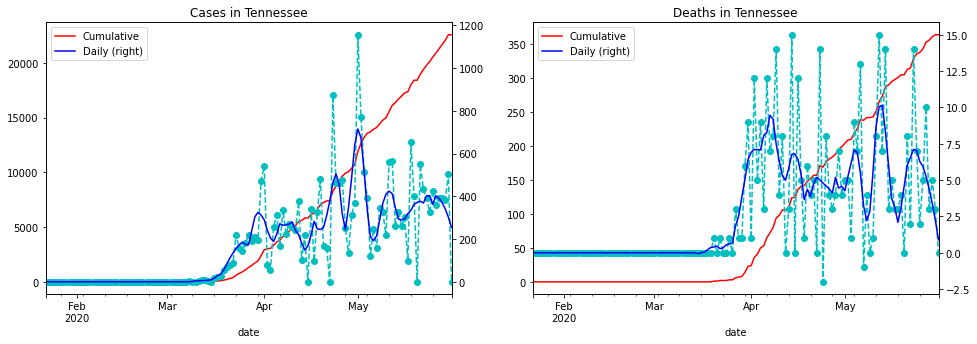

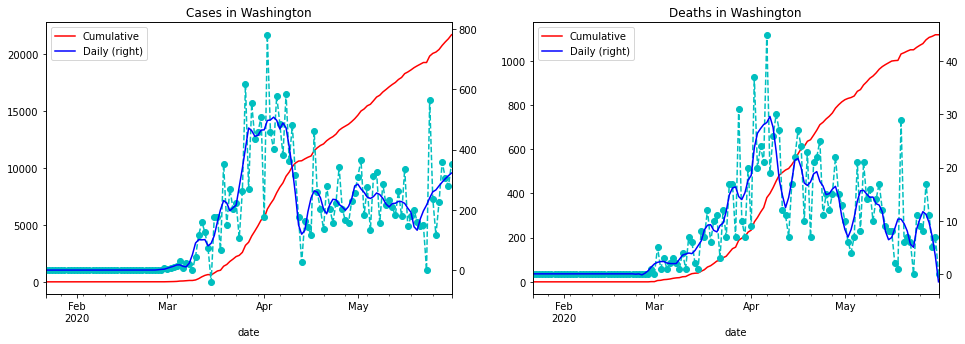

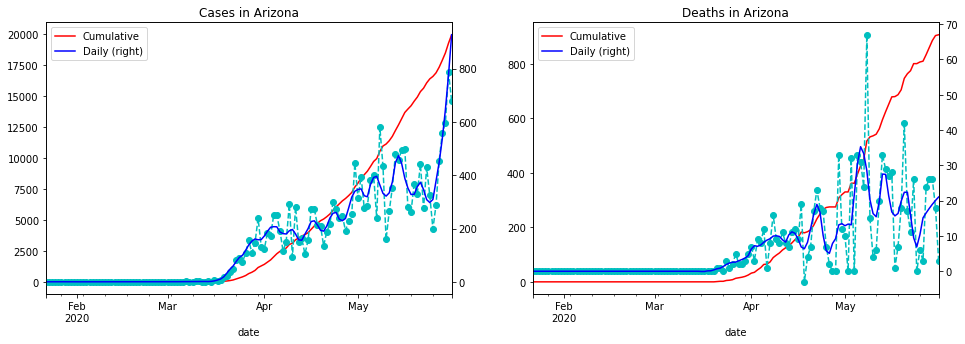

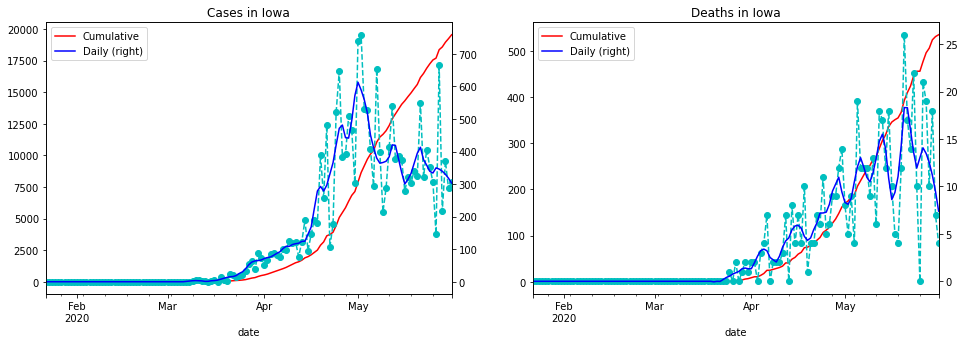

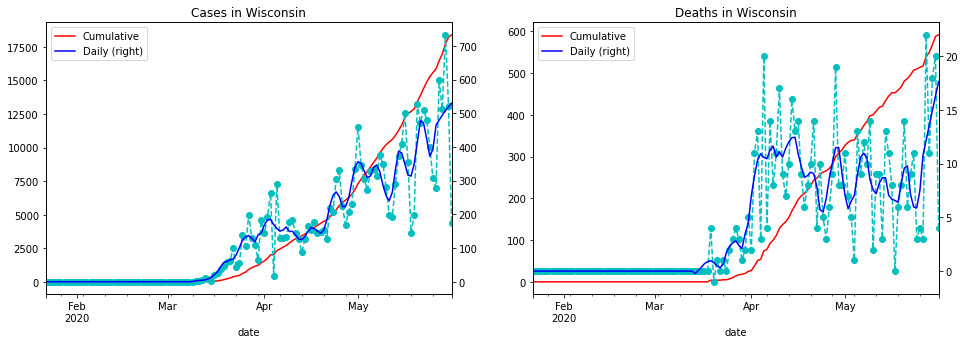

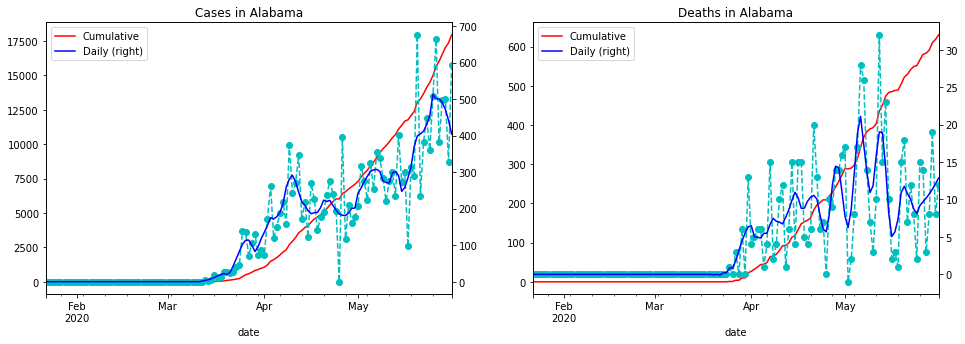

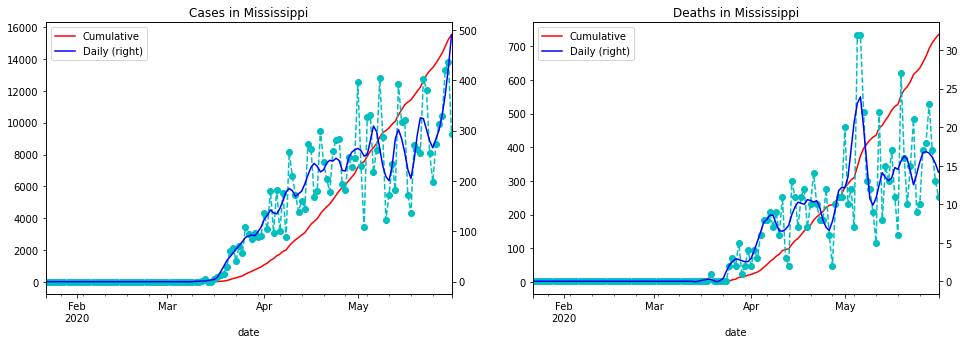

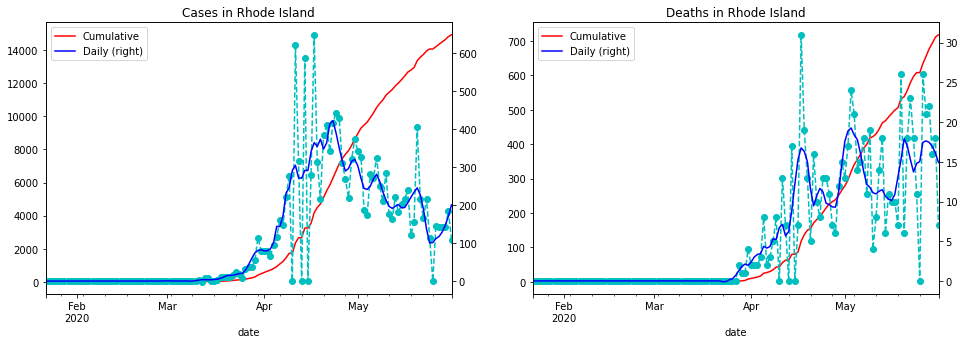

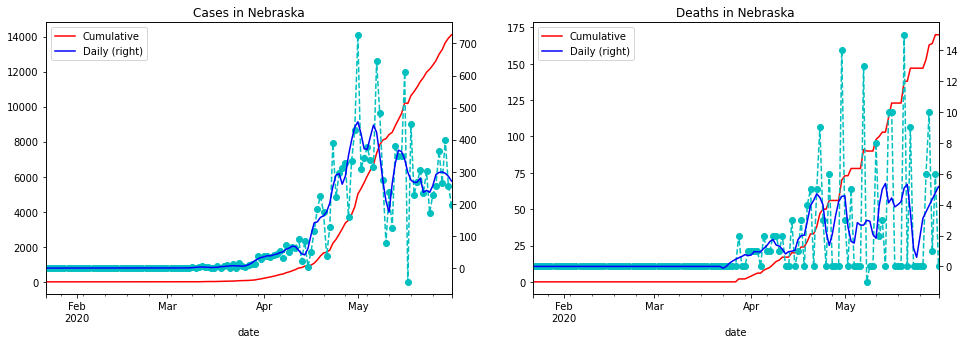

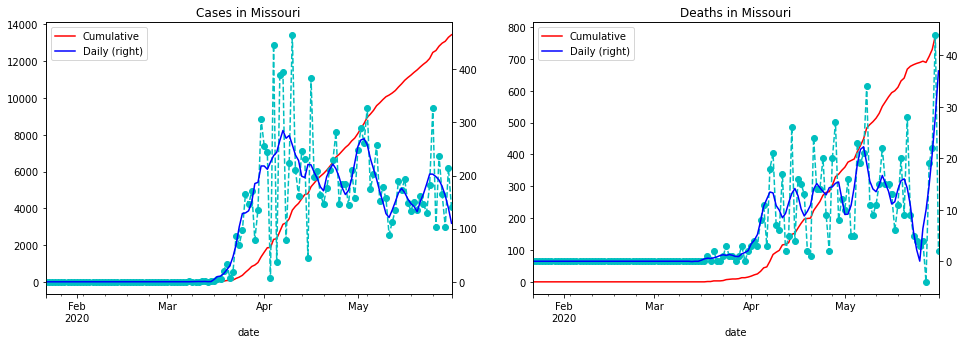

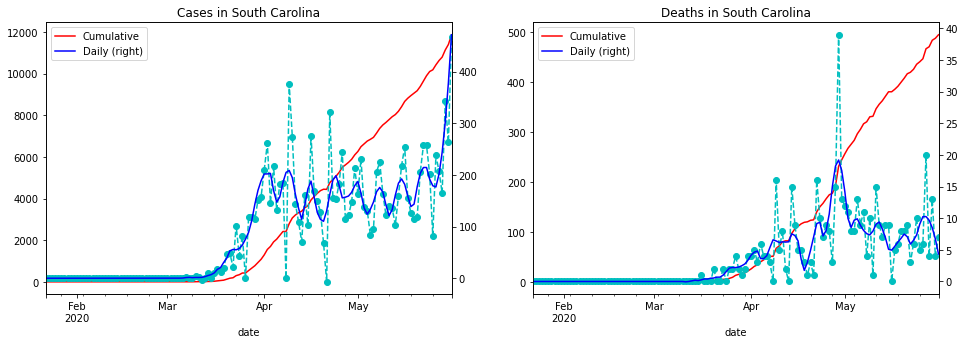

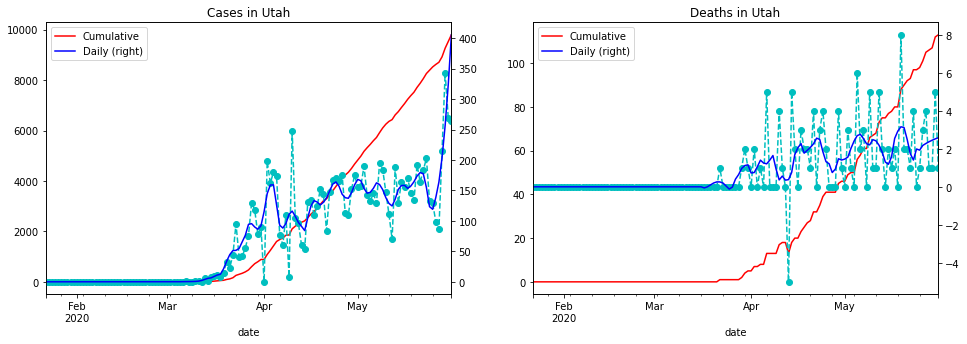

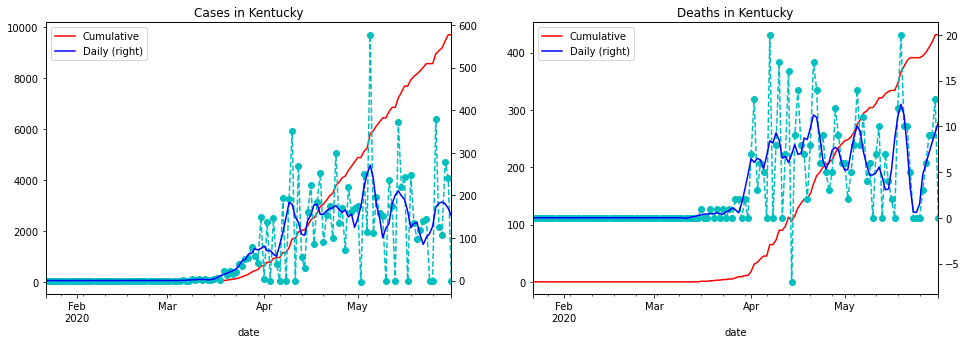

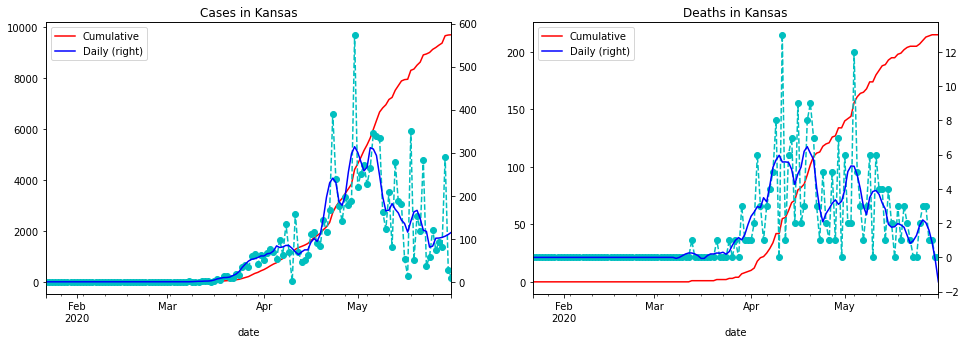

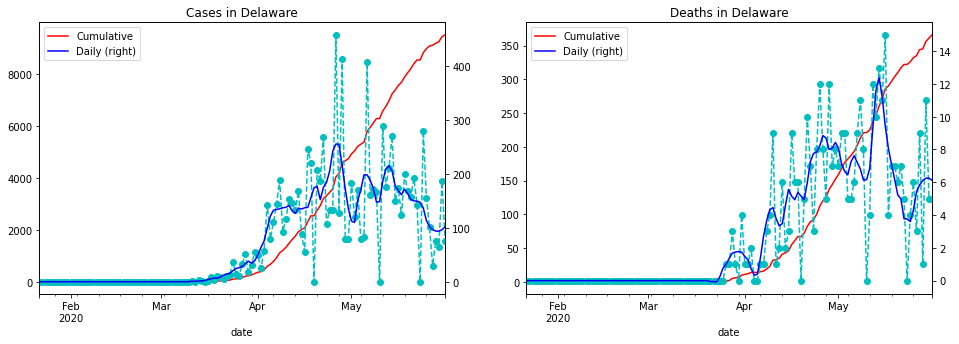

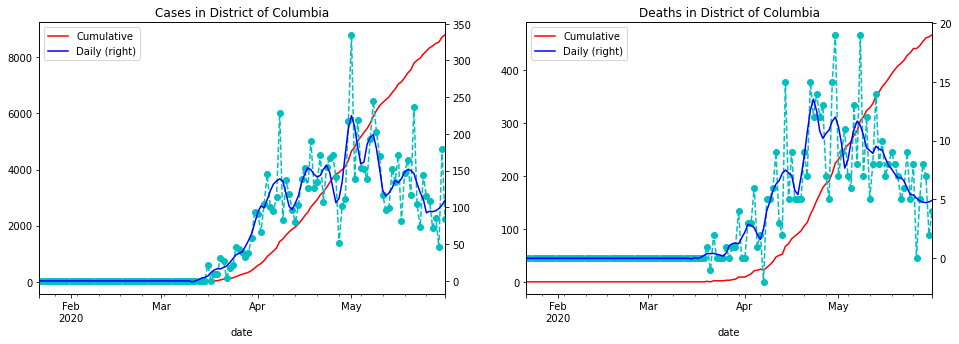

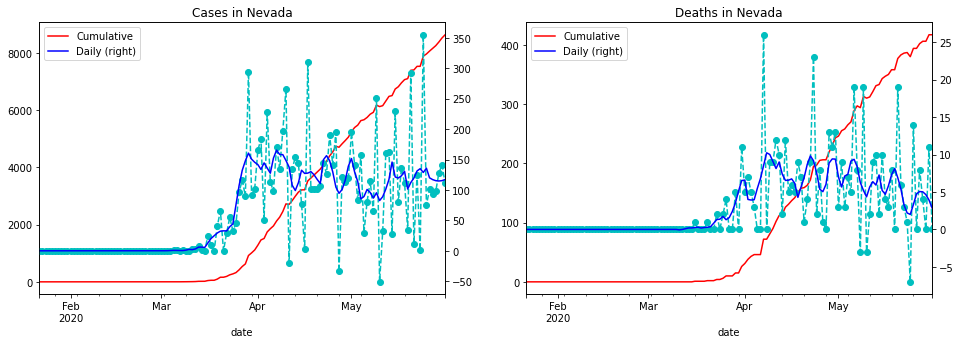

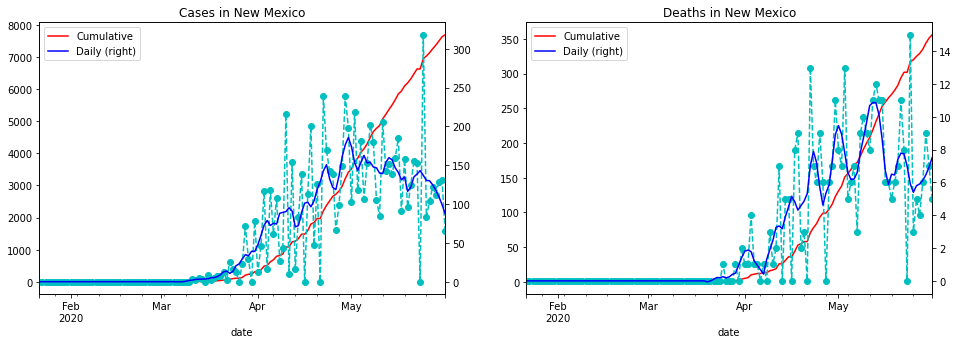

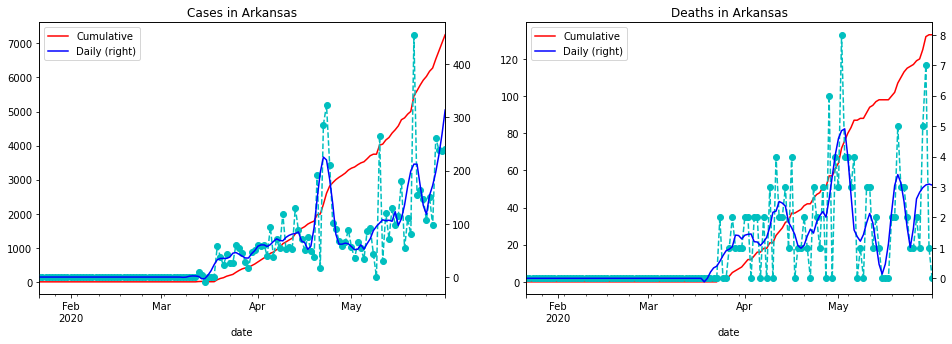

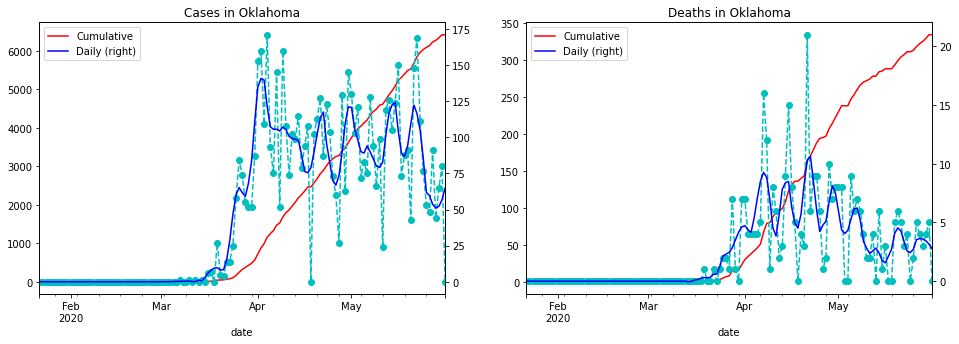

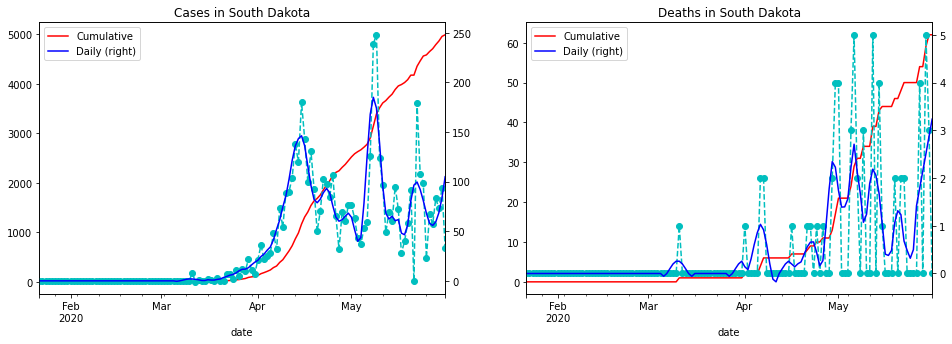

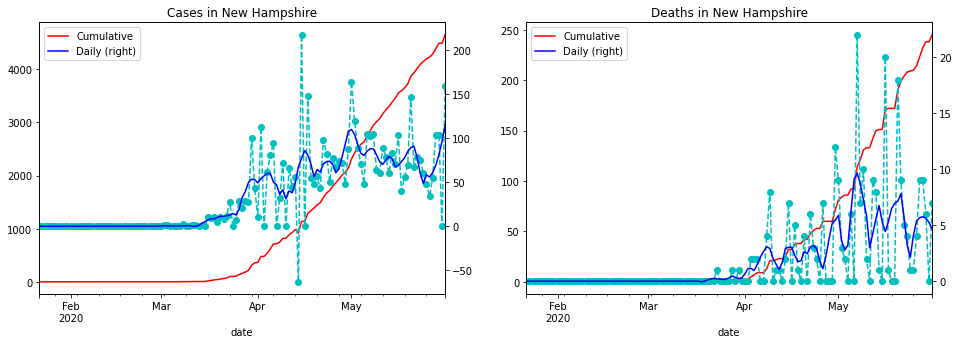

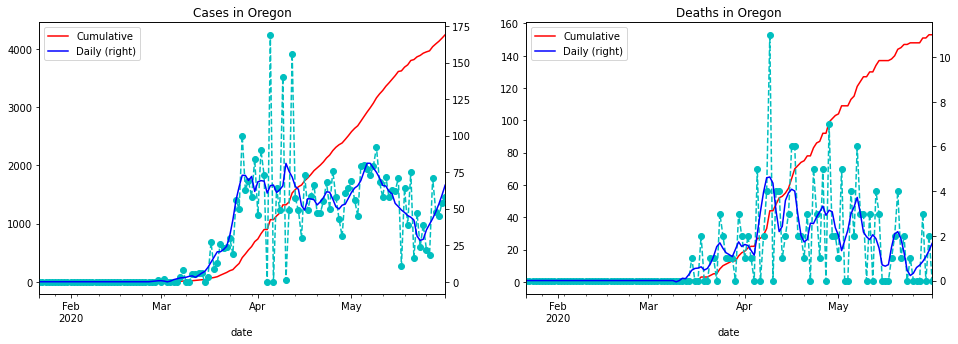

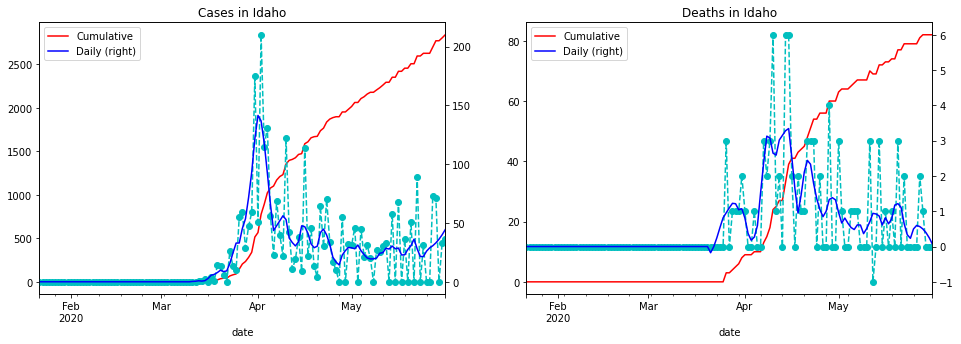

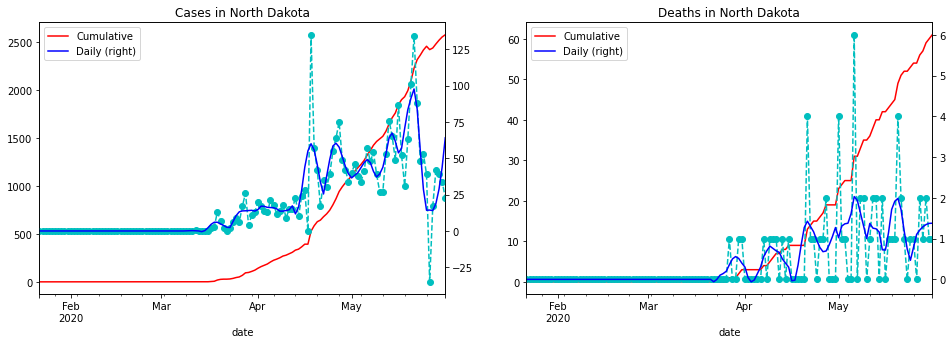

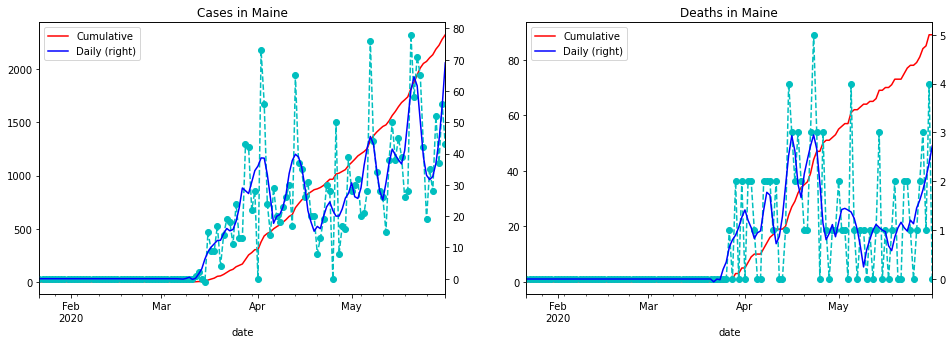

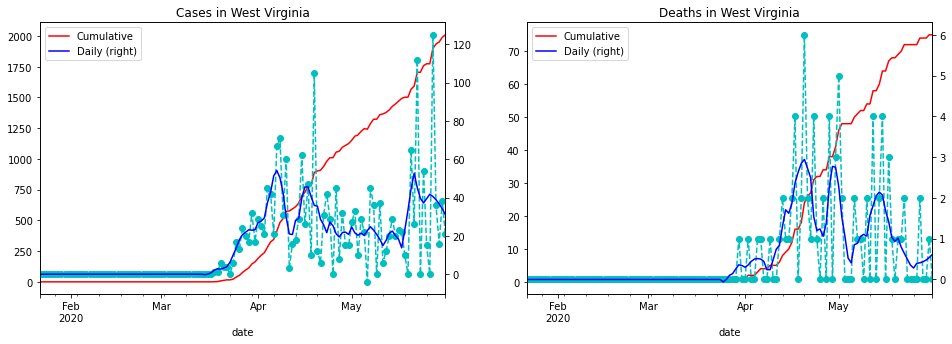

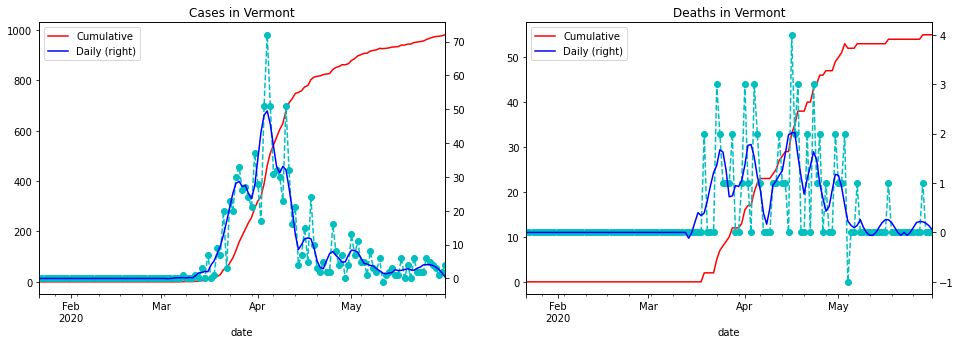

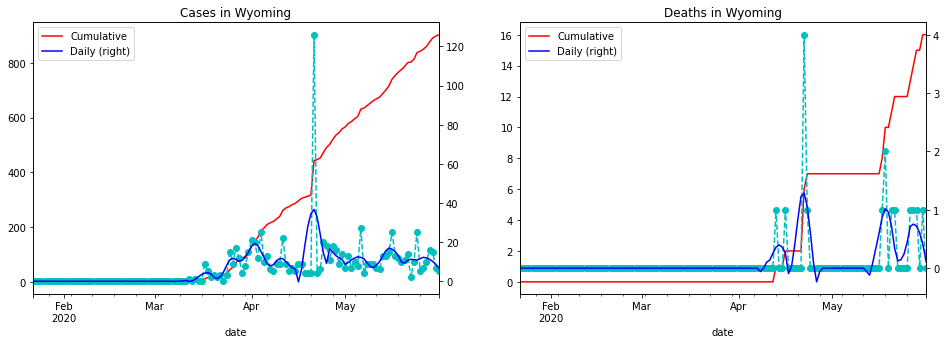

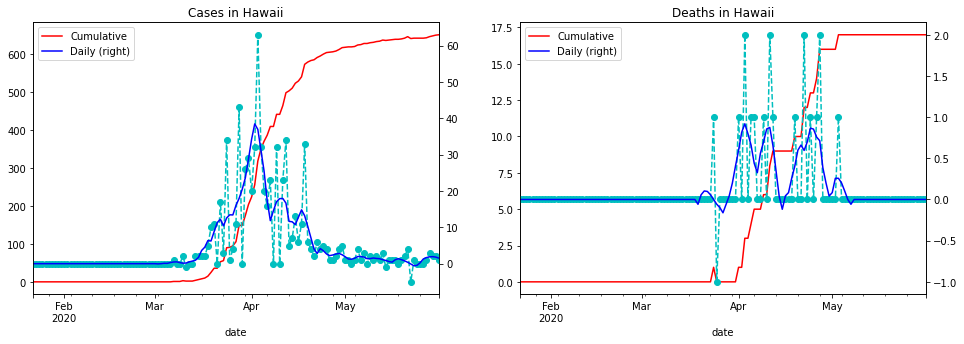

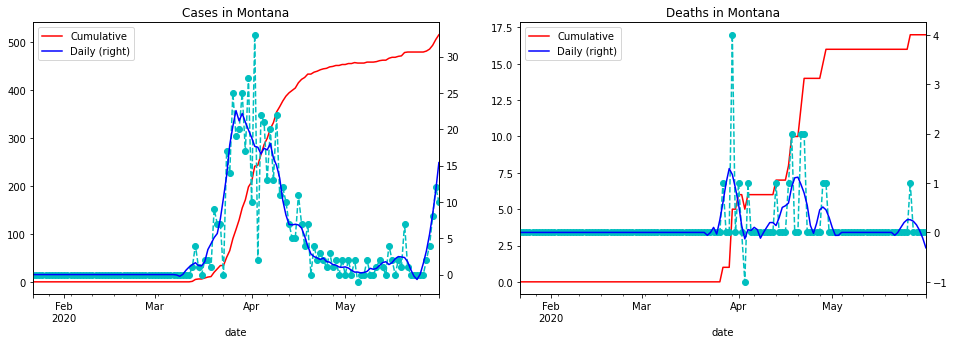

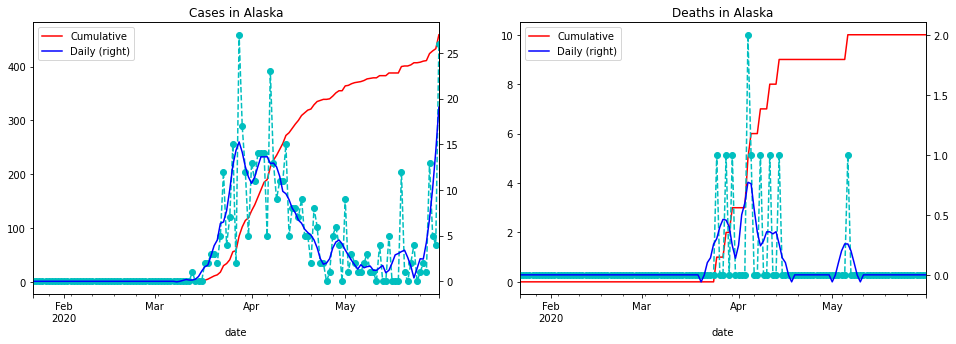

In [31]:
for c in cases_summary.index:
    plot_daily(cases, deaths, c)
    plt.show()

In [32]:
deaths_summary.head()

Alabama        630
Alaska          10
Arizona        907
Arkansas       133
California    4172
dtype: int64

In [33]:
number_of_state = 10

In [34]:
by_state = pd.concat([cases_summary, deaths_summary], axis=1)

In [35]:
by_state.columns = ["Cases", "Deaths"]

In [36]:
by_state.sort_values(by="Cases", ascending=False, inplace=True)

In [37]:
by_state["rate"] = by_state["Deaths"] / by_state["Cases"]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3caba750d0>],
      dtype=object)

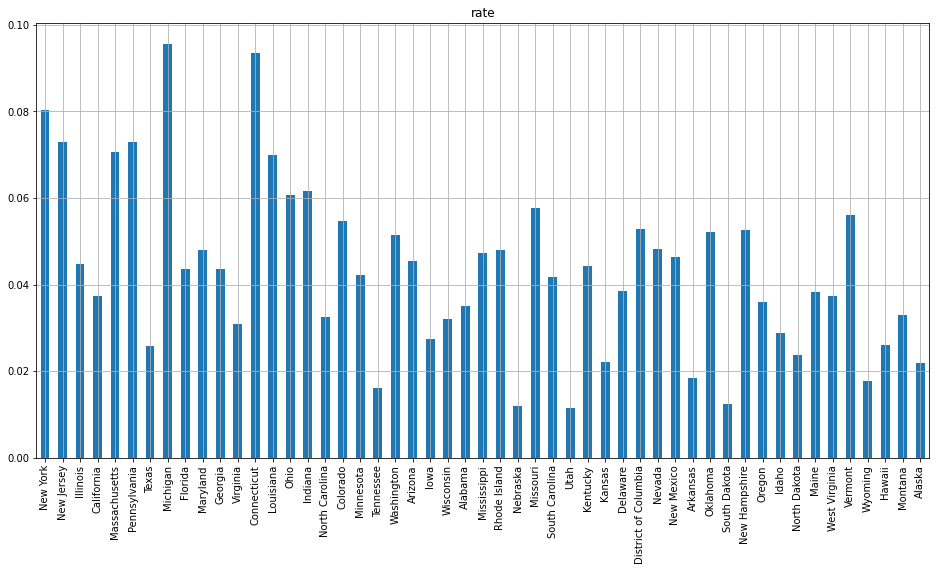

In [38]:
by_state["rate"].plot.bar(subplots=True, figsize=(16, 8), legend=False, grid=True)

In [39]:
by_state = pd.concat([
    by_state.iloc[:number_of_state],
    pd.DataFrame([by_state.iloc[number_of_state:].sum(), ])
]
)

In [40]:
by_state.rename(index={0: 'others'}, inplace=True)

In [41]:
by_state

Cases   Deaths      rate
New York       370770.0  29784.0  0.080330
New Jersey     160445.0  11698.0  0.072910
Illinois       120260.0   5390.0  0.044820
California     111951.0   4172.0  0.037266
Massachusetts   96965.0   6846.0  0.070603
Pennsylvania    76129.0   5555.0  0.072968
Texas           64652.0   1675.0  0.025908
Michigan        57397.0   5491.0  0.095667
Florida         56163.0   2451.0  0.043641
Maryland        52778.0   2532.0  0.047975
others         618471.0  28635.0  1.623008

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3ca86669d0>,
      dtype=object)

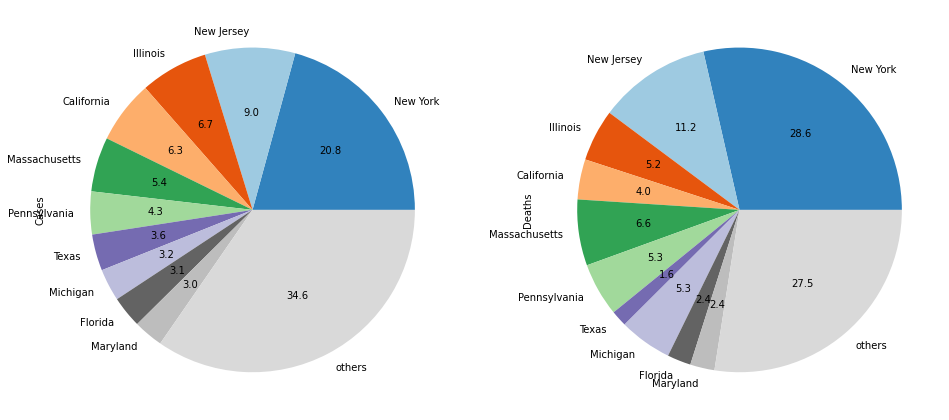

In [42]:
by_state[["Cases", "Deaths"]].plot.pie(subplots=True, figsize=(16, 9), cmap=plt.cm.get_cmap('tab20c'), legend=False, autopct='%.1f')

In [43]:
by_state.loc["others", "rate"] = by_state.loc["others", "Deaths"] / by_state.loc["others", "Cases"]

In [44]:
by_state

Cases   Deaths      rate
New York       370770.0  29784.0  0.080330
New Jersey     160445.0  11698.0  0.072910
Illinois       120260.0   5390.0  0.044820
California     111951.0   4172.0  0.037266
Massachusetts   96965.0   6846.0  0.070603
Pennsylvania    76129.0   5555.0  0.072968
Texas           64652.0   1675.0  0.025908
Michigan        57397.0   5491.0  0.095667
Florida         56163.0   2451.0  0.043641
Maryland        52778.0   2532.0  0.047975
others         618471.0  28635.0  0.046300

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3ca3f0de10>],
      dtype=object)

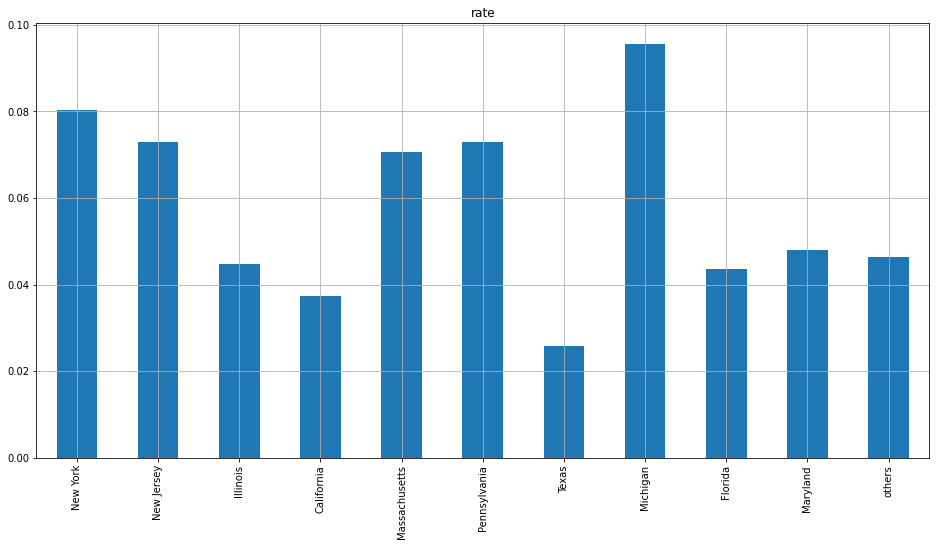

In [45]:
by_state["rate"].plot.bar(subplots=True, figsize=(16, 8), legend=False, grid=True)